In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("mobile data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
y=df['price_range']

In [12]:
x=df.drop(['price_range'],axis=1)

In [13]:
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

In [14]:
# rice,chini,kapoor dhuar saban, vimbar, eggs

# Extra Tree Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree
extr = ExtraTreesClassifier()
extr.fit(x,y)

ExtraTreesClassifier()

In [16]:
extr.feature_importances_ # IG from decision tree

array([0.06259339, 0.01937508, 0.03272015, 0.01923992, 0.03225561,
       0.01621584, 0.03598847, 0.03366486, 0.03616364, 0.03275393,
       0.03392162, 0.04686707, 0.04821432, 0.39288259, 0.03418151,
       0.03388563, 0.0354638 , 0.01431225, 0.01910874, 0.02019156])

In [18]:
imp=pd.DataFrame(extr.feature_importances_, columns=['Gain_Score'])
imp.head(10)

,Gain_Score
0,0.062593
1,0.019375
2,0.032720
3,0.019240
4,0.032256
5,0.016216
6,0.035988
7,0.033665
8,0.036164
9,0.032754


In [19]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [20]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols.head(10)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [21]:
gains = pd.concat([cols,imp],axis=1)
gains.head(15)

,Feature_Names,Gain_Score
0,battery_power,0.062593
1,blue,0.019375
2,clock_speed,0.032720
3,dual_sim,0.019240
4,fc,0.032256
5,four_g,0.016216
6,int_memory,0.035988
7,m_dep,0.033665
8,mobile_wt,0.036164
9,n_cores,0.032754


In [23]:
gains.nlargest(15,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.392883
0,battery_power,0.062593
12,px_width,0.048214
11,px_height,0.046867
8,mobile_wt,0.036164
6,int_memory,0.035988
16,talk_time,0.035464
14,sc_h,0.034182
10,pc,0.033922
15,sc_w,0.033886


In [25]:
newx=gains.nlargest(15,'Gain_Score')

<AxesSubplot:>

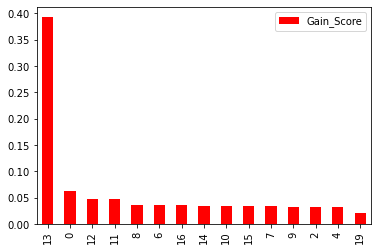

In [26]:
newx.plot(kind='bar',color=['red']) 

In [27]:
gains.nlargest(14,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.392883
0,battery_power,0.062593
12,px_width,0.048214
11,px_height,0.046867
8,mobile_wt,0.036164
6,int_memory,0.035988
16,talk_time,0.035464
14,sc_h,0.034182
10,pc,0.033922
15,sc_w,0.033886


<AxesSubplot:>

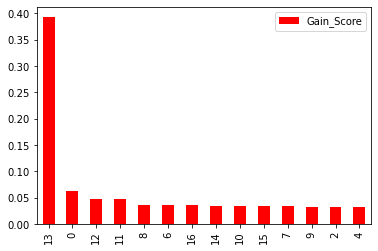

In [28]:
newx1=gains.nlargest(14,'Gain_Score')
newx1.plot(kind='bar',color=['red']) 